In [1]:
import os, shutil
import platform
import pymzml
import plotly.io as pio
import plotly.graph_objs as go
import h5py
import hdf5plugin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mzapy

No module named 'ms_deisotope._c.averagine' averagine
No module named 'ms_deisotope._c.scoring'
No module named 'ms_deisotope._c.deconvoluter_base'
No module named 'ms_deisotope._c.deconvoluter_base'
No module named 'ms_deisotope._c.deconvoluter_base'
Hello


# mzML using pymzml

In [4]:
mzml_file_path="MZA/test_data_mza_exe/test_6.mzML"

In [5]:
run = pymzml.run.Reader(mzml_file_path,skip_chromatogram=False)


term not found (MS:1000767)
term not found (MS:1000767)
term not found (MS:1000008)
term not found (MS:1000008)
term not found (MS:1000443)
term not found (MS:1000443)


In [6]:
for n, spec in enumerate(run):
    print(
            "Spectrum {0}, MS level {ms_level} @ RT {scan_time:1.2f}".format(
                spec.ID, ms_level=spec.ms_level, scan_time=spec.scan_time_in_minutes()
            )
        )
    


Spectrum 1, MS level 1 @ RT 0.01
Spectrum 2, MS level 1 @ RT 0.01
Spectrum 3, MS level 1 @ RT 0.01
Spectrum 4, MS level 1 @ RT 0.02
Spectrum 5, MS level 1 @ RT 0.02
Spectrum 6, MS level 1 @ RT 0.02
Spectrum 7, MS level 1 @ RT 0.02
Spectrum 8, MS level 1 @ RT 0.02
Spectrum 9, MS level 1 @ RT 0.03
Spectrum 10, MS level 1 @ RT 0.03
Spectrum 11, MS level 1 @ RT 0.03
Spectrum 12, MS level 1 @ RT 0.03
Spectrum 13, MS level 1 @ RT 0.03
Spectrum 14, MS level 1 @ RT 0.03
Spectrum 15, MS level 1 @ RT 0.04
Spectrum 16, MS level 1 @ RT 0.04
Spectrum 17, MS level 1 @ RT 0.04
Spectrum 18, MS level 1 @ RT 0.04
Spectrum 19, MS level 1 @ RT 0.04
Spectrum 20, MS level 1 @ RT 0.04
Spectrum 21, MS level 1 @ RT 0.05
Spectrum 22, MS level 1 @ RT 0.05
Spectrum 23, MS level 1 @ RT 0.05
Spectrum 24, MS level 1 @ RT 0.06
Spectrum 25, MS level 1 @ RT 0.06
Spectrum 26, MS level 1 @ RT 0.06
Spectrum 27, MS level 1 @ RT 0.06
Spectrum 28, MS level 1 @ RT 0.06
Spectrum 29, MS level 1 @ RT 0.06
Spectrum 30, MS level 1

## Plot using pymzml

In [7]:
p = pymzml.plot.Factory()
pio.renderers.default = 'iframe'
t=p.add(run[1000].peaks("centroided"), color=(0, 0, 0), style="sticks", name="peaks")
plot = go.Figure(data=t)      
plot.show()


## Various pymzml func

In [ ]:
def find_peaks(mz_to_find = 152.9486):
    found_peaks=[]
    limit=200
    found_high_peaks=[]
    for spectrum in run:
        
            found_peaks = spectrum.has_peak(mz_to_find)
            
            if found_peaks != []:
                peaks_i=pd.DataFrame(found_peaks).iloc[0,1]
                if peaks_i>limit:
                    print("Found peaks: {0} in spectrum {1}".format(found_peaks, spectrum.ID))
    
find_peaks(124.087447)

In [ ]:


def extract_ion_chromatogram(run):
    """
    Demonstration of the extraction of a specific ion chromatogram, i.e. XIC or EIC

    All intensities and m/z values for a target m/z are extracted.

    usage:

        ./extract_ion_chromatogram.py

    """


    time_dependent_intensities = []

    MZ_2_FOLLOW = 124.0870
    for spectrum in run:
        if spectrum.ms_level == 1:
            has_peak_matches = spectrum.has_peak(MZ_2_FOLLOW)
            if has_peak_matches != []:
                for mz, I in has_peak_matches:
                    time_dependent_intensities.append(
                        [spectrum.scan_time_in_minutes(), I, mz]
                    )
    print("RT   \ti   \tmz")
    for rt, i, mz in time_dependent_intensities:
        print("{0:5.3f}\t{1:13.4f}\t{2:10}".format(rt, i, mz))
    return


extract_ion_chromatogram(run)

In [8]:
run[343].get_tims_tof_ion_mobility()

Requested array (mean inverse reduced ion mobility array) not found.
Available arrays are:
	- m/z array
	- intensity array
Requested array (mean inverse reduced ion mobility array) not found.
Available arrays are:
	- m/z array
	- intensity array


In [ ]:
print("Checking if the file contains Ion Mobility data ...")
if run[1].get('MS:1002476', 0):
    print("       Found Ion Mobolity")
    io=run[1].get('MS:1002476', 0)
else:
    print("       Did not find Ion Mobolity")

In [ ]:
pd.DataFrame(run[1])

In [ ]:
def find_highest_peaks(run):
    for i in range(1,1272):

        t=run[i].highest_peaks(1)


In [9]:
def get_ms_and_msms_counts(run):
    time=[]
    count=[]
    count_2=[]
    level=[]
    time_2= []
    for i in range(1,1273):
        current_level=run[i].ms_level
        level.append(current_level)
        #print(current_level)
        
        if current_level==2: 
            
            count_2.append(run[i].TIC)
            time_2.append(run[i].scan_time_in_minutes())
        else:
            count.append(run[i].TIC)
            time.append(run[i].scan_time_in_minutes())
    
    print(len(count), "MS spectrum and ", len(count_2), "MS/MS spectrum")
    return count, time, count_2, time_2

count, time, count_2, time_2=get_ms_and_msms_counts(run)

533 MS spectrum and  739 MS/MS spectrum


## Plot TIC MS/MS and MS

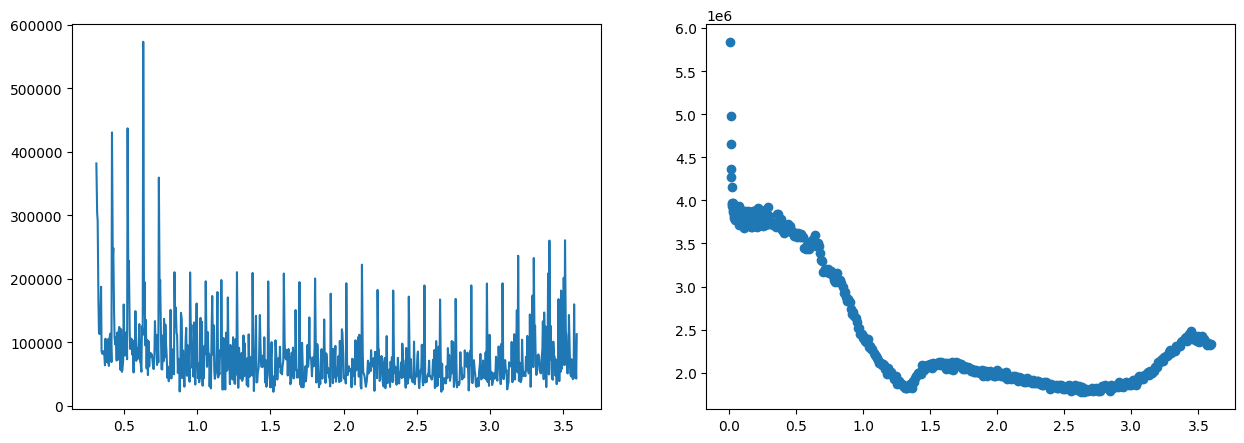

In [10]:
fig, ax=plt.subplots(1,2, figsize=(15,5))

ax[0].plot(time_2,count_2)
ax[1].scatter(time,count)

# MZA opening (after converting from .d)

Converted .d folder using MZA library from: https://github.com/PNNL-m-q/mza/tree/main

wine mza -file 2_P2-B-1_1_6.d -intensityThreshold 20

## Add all metadata, including mz conversion of bins

In [11]:

intensities_all=[]
mz_all=[]

mzafile = "../2025-02-11-timsTOF/2_P2-B-1_1_6.mza"
mzafile="MZA/example_mza_exe/5_P2-A-11_1_204.mza"
mza = h5py.File(mzafile, 'r')
#print(list(mza.keys())) # h5py.File acts like a Python dictionary

# Reading Metadata table:
metadata = mza["Metadata"]
mz_data=pd.DataFrame(mza["Full_mz_array"], columns=["mz_values"])
mz_data.index.name ="bin"
mz_data_dict = dict([(i,x) for i,x in zip(mz_data.index, mz_data["mz_values"])])
mz_data_dict[644454]=2000 #Adding max value -- was missing in mz_bin list
mz_data_dict[644453]=2000 #Adding max value -- was missing in mz_bin list
# Save metadata table as csv:
metadata = pd.DataFrame(np.array(metadata))
metadata.to_csv(mzafile.replace(".mza",".csv"), index=False)
meta_w_mz=metadata.copy()
meta_w_mz["mz"]=None
meta_w_mz["intensities"]=None
meta_w_mz["mz"] = meta_w_mz["mz"].astype('object')
meta_w_mz["intensities"] = meta_w_mz["intensities"].astype('object')

# Reading spectrum from row 2250 in metadata table:
#   corresponds to scan ID 2251 (RT 18.02 min)
#   contains base peak ion 703.57 m/z
#for i in metadata.index:
for i in range(0,len(metadata)):
    scanRow= i
    scanID = metadata["Scan"][scanRow]
    mzaPath = str(metadata["MzaPath"][scanRow], 'utf-8')
    
    #print(str(metadata["MSLevel"][scanRow]))
    # 2 jagged arrays with the intensity and m/z values:
    intensities = mza["Arrays_intensity" + mzaPath + "/" + str(scanID)][:] # Array at "Arrays_intensity/2251" in mza file
    #intensities_all.append(intensities)
    
    mz = mza["Arrays_mzbin" + mzaPath + "/" + str(scanID)][:] # Array at "Arrays_mz/2251" in mza file
    mz=pd.DataFrame(mz, columns=["mz_bin"])
    try:
        mz_translated=mz["mz_bin"].apply(lambda x: mz_data_dict[x])
    except: 
        print("Couldn't find bin") # If printed, run again with this uncommented and find what value is missing
        #mz_translated=[]
       # for m in mz["mz_bin"]:
         #   if m in mz_data_dict.keys():
            #    mz_translated.append(mz_data_dict[m])
           # else:
             #   print(m, " is the missing value")
              #  mz_data_dict[m]=1300
               # mz_translated.append(mz_data_dict[m])
        
    meta_w_mz.at[i,"intensities"]=list(intensities)
    meta_w_mz.at[i,"mz"]=list(mz_translated)

mza.close()

Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't find bin
Couldn't f

In [12]:
print("A total of" , len(metadata), "scans over",len(metadata["RetentionTime"].value_counts()), "different RTs")
print("Of these scans", len(metadata[metadata["MSLevel"]==1]), "were MS scans and",len(metadata[metadata["MSLevel"]==2]), "were MS/MS scans covering", len(metadata["IsolationWindowTargetMz"].value_counts())-1, "different target mz values")

A total of 1423504 scans over 2836 different RTs
Of these scans 915228 were MS scans and 508276 were MS/MS scans covering 15176 different target mz values


## Divide into MS and MS/MS 

In [13]:
meta_w_mz

,Scan,MzaPath,MSLevel,Polarity,Activation,CollisionEnergy,RetentionTime,PrecursorScan,PrecursorMonoisotopicMz,PrecursorCharge,IsolationWindowTargetMz,IsolationWindowLowerOffset,IsolationWindowUpperOffset,TIC,SpectrumTitle,IonMobilityFrame,IonMobilityBin,IonMobilityTime,mz,intensities
0,0,b'',1,b'POS',b'',0,0.011195,0,0.000000,0,0.000000,0.0,0.0,814574.0,b'',1,0,0.000000,"[309.93124070845306, 864.5258040046272, 119.37...","[130, 34, 21, 32, 21, 21, 31, 21, 29, 31, 37, ..."
1,45,b'',1,b'POS',b'',0,0.011195,0,0.000000,0,0.000000,0.0,0.0,21.0,b'',1,45,1.593081,[309.93124070845306],[21]
2,47,b'',1,b'POS',b'',0,0.011195,0,0.000000,0,0.000000,0.0,0.0,34.0,b'',1,47,1.591132,[864.5258040046272],[34]
3,49,b'',1,b'POS',b'',0,0.011195,0,0.000000,0,0.000000,0.0,0.0,21.0,b'',1,49,1.589183,[119.37499362552764],[21]
4,50,b'',1,b'POS',b'',0,0.011195,0,0.000000,0,0.000000,0.0,0.0,32.0,b'',1,50,1.588209,[114.78070094563338],[32]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423499,2989085,b'P3',2,b'POS',b'CID',20,5.047375,0,194.990758,1,194.990758,1.0,1.0,117.0,b'',2836,995,0.613513,[195.0018234608484],[117]
1423500,2989090,b'P3',2,b'POS',b'CID',20,5.047375,0,194.990758,1,194.990758,1.0,1.0,127.0,b'',2836,1000,0.608054,"[102.16095549298427, 151.0026305306742]","[26, 101]"
1423501,2989092,b'P3',2,b'POS',b'CID',20,5.047375,0,194.990758,1,194.990758,1.0,1.0,32.0,b'',2836,1002,0.605870,[144.05616338530479],[32]
1423502,2989094,b'P3',2,b'POS',b'CID',20,5.047375,0,194.990758,1,194.990758,1.0,1.0,97.0,b'',2836,1004,0.603685,[151.00142603471372],[97]


In [ ]:
ms_df=meta_w_mz[meta_w_mz["MSLevel"]==1]
msms_df=meta_w_mz[meta_w_mz["MSLevel"]==2]


## Plotting

In [ ]:

pio.renderers.default = 'iframe'
df=meta_w_mz[meta_w_mz["Scan"]==41]
mz=meta_w_mz.loc[i,"mz"]
inte=meta_w_mz.loc[i,"intensities"]
iot=[meta_w_mz.loc[i,"IonMobilityTime"]]*len(mz)
fig = go.Figure(data=go.Scatter3d(x=mz,y=iot,z=inte, mode="markers"))

fig.show()


In [ ]:
# Plot spectrum:
i=70000
mz=meta_w_mz.loc[i,"mz"]
inte=meta_w_mz.loc[i,"intensities"]
plt.stem(mz, inte, markerfmt='')

## Mean over Ion mobility and TIC
This is wrong as it turns out that even it we have the same Precursor, each scan will result in several mz:es. Or, is the Ion Mobility measured on the Precursor? In that case, go ahead an merge

In [ ]:

RTs=list(msms_df["RetentionTime"].unique())
values_df=pd.DataFrame(index=range(0,len(RTs)), columns=msms_df.columns)
k=0
for time in RTs:
    df_one_RT=msms_df[msms_df["RetentionTime"]==time]
    target_MZ=list(df_one_RT["IsolationWindowTargetMz"].unique())
    for j, mz in enumerate(target_MZ):
        df_one_MZ=df_one_RT[df_one_RT["IsolationWindowTargetMz"]==mz].iloc[1:,:] #dropping the big first on"
        for i,name in enumerate(values_df.columns):
            if
            try: 
                values_df.loc[k,name]=df_one_MZ[name].mean()
            except:
                values_df.loc[k,name]=df_one_MZ.iloc[0,i]
        k=k+1
#values_df #mean over Ion mobility time and TIC (sum tic instead?)

## Filter on RT and MZ 
To find the number of scans for a specific RT and MZ

In [ ]:
time=RTs[100]
test=metadata[metadata["RetentionTime"]==time]
test[test["PrecursorMonoisotopicMz"]==test["PrecursorMonoisotopicMz"].unique()[0]]

## Find a target mz in MZA file

In [ ]:
n=4
mz=123.079647318
#mz=124.087447318
mz=round(mz,n)
df_wo_0=meta_w_mz[meta_w_mz["IonMobilityTime"]!=0]
index=[]
for i in df_wo_0.index:
    mz_list=df_wo_0.loc[i,"mz"]
    mz_list=[round(item,n) for item in mz_list]
    if mz in mz_list:
        index.append(i)
        #print(i,mz)
   # else:
       # print(mz_list)
    
df_wo_0.loc[index,:]
#This gives me all mz values in the scan where the target was found

# Open timspy

In [14]:
import pathlib
from pprint import pprint

from opentimspy.opentims import OpenTIMS


 # get data handle
path = pathlib.Path('../2025-02-11-timsTOF/2_P2-B-1_1_6.d')
path = pathlib.Path('MZA/example_mza_exe/5_P2-A-11_1_204.d')
D = OpenTIMS(path)  # get data handle
print(D)
# TimsPyDF(404183877 peaks)

print(len(D)) # The number of peaks.
# 404183877 

#D.intensity_per_frame() # Return combined intensity for each frame.


OpenTIMS(18_028_738 peaks)
18028738


In [15]:
D.framesTIC() # Return combined intensity for each frame.
# array([ 95910, 579150, 906718, ..., 406317,   8093,   8629])

array([ 816423,   17482,  883266, ...,   15901, 2262569,   13908],
      shape=(2836,), dtype=uint32)

In [16]:
try:
    import opentims_bruker_bridge
    all_columns = ('frame','scan','tof','intensity','mz','inv_ion_mobility','retention_time')
except ModuleNotFoundError:
    print("Without Bruker proprietary code we cannot yet perform tof-mz and scan-dt transformations.")
    print("Download 'opentims_bruker_bridge' if you are on Linux or Windows.")
    print("Otherwise, you will be able to use only these columns:")
    all_columns = ('frame','scan','tof','intensity','retention_time')


# We consider the following columns:
print(all_columns)
# ('frame', 'scan', 'tof', 'intensity', 'mz', 'inv_ion_mobility', 'retention_time')

('frame', 'scan', 'tof', 'intensity', 'mz', 'inv_ion_mobility', 'retention_time')


## Plot one RT

<StemContainer object of 3 artists>

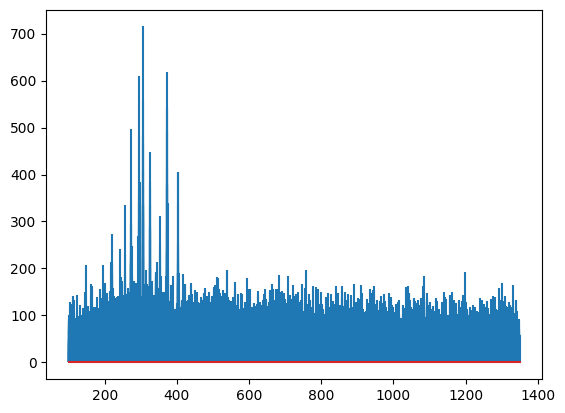

In [17]:
df_tims=pd.DataFrame(D.query(frames=[1], columns=all_columns))
plt.stem(df_tims["mz"],df_tims["intensity"],markerfmt=' ')

## Divide into MS and MS/MS 

In [18]:
df_tims=pd.DataFrame(D.query())
print("Number of MS/MS frames: ", len(D.ms2_frames), ". Number of MS frames: ", len(D.ms1_frames))
frame_dict={}

frame_list=[int(x) for x in list(D.ms2_frames)]
frame_list_ms=[int(x) for x in list(D.ms1_frames)]

for x in frame_list:
    frame_dict[x]="MS2" 
    
for x in frame_list_ms:
    frame_dict[x]="MS1" 
df_tims["MS level"]=df_tims["frame"].apply(lambda x: frame_dict[x])

Number of MS/MS frames:  1890 . Number of MS frames:  946


In [19]:
df_tims

,frame,scan,tof,intensity,mz,inv_ion_mobility,retention_time,MS level
0,1,44,369858,20,790.890291,1.595029,0.671697,MS1
1,1,45,155250,21,309.929515,1.594055,0.671697,MS1
2,1,47,395975,34,864.522922,1.592107,0.671697,MS1
3,1,49,18972,21,119.373923,1.590158,0.671697,MS1
4,1,50,14640,32,114.779651,1.589183,0.671697,MS1
...,...,...,...,...,...,...,...,...
18028733,2836,1000,2273,26,102.159967,0.609146,302.842496,MS2
18028734,2836,1000,46771,101,151.001430,0.609146,302.842496,MS2
18028735,2836,1002,40936,32,144.054990,0.606962,302.842496,MS2
18028736,2836,1004,46770,97,151.000225,0.604777,302.842496,MS2


# Target mz-value 
Plot all occurences

In [ ]:
target_mz_df=pd.read_csv("../2025-02-11-timsTOF/target_mz.csv")
target_mz_df=target_mz_df[target_mz_df["Position"]=="B01"]
target_mz_df=target_mz_df.iloc[:,-3:]
target_mz_df.columns=["mass", "mass+","SMILES"]
target_mz_df=target_mz_df.set_index("SMILES")
target_mz_df.columns=["mass", "mass+"]
from rdkit import Chem


## Find match 

NOTE: takes ~10 minutes to run

In [ ]:
def find_match(df,n,mz):
    df_rounded=df.copy()
    df_rounded["mz"]=df["mz"].apply(lambda x: round(x,n))
    target_df=df_rounded[df_rounded["mz"]==round(mz,n)]
    idx=target_df.index.values
    df=df.loc[idx,:]
    return df

def evaluate_target(df,n,mz):
    target_df=find_match(df,n,mz)
    if len(target_df)==0:
        
        n=n-1
       #print("Target not found. Decreasing decimal number to",n)
        if n>1:
            target_df=evaluate_target(df,n,mz)
        else: 
            #print("Didn't find target with more than",n,"decimals. Breaking")
            return
    else:
        #print("Found", len(target_df), "matches at",n, "decimals")
        target_df["target_mz"]=mz
        target_df["n_dec"]=n
    return target_df
    



In [ ]:
#NOTE: takes ~10 minutes to run
n_start=5 #decrease if no result
col=list(df_tims.columns.values)

col.append("target_mz")
col.append("n_dec")
df_matched_m_plus=pd.DataFrame(columns=col)
for k in range(0,len(target_mz_df)):
    mz=target_mz_df.iloc[k,-1] #second column of target (mass +)
    print("Looking for mz " ,mz, "at row" , k, "of" ,len(target_mz_df)) 
    t=evaluate_target(df_tims,n_start,mz)
    df_matched_m_plus=pd.concat([df_matched_m_plus,t])


In [ ]:
# Added to allow range around mz
def find_match_tol(df,n,mz):
    df_rounded=df.copy()
    dec=1/(10**n)
    df_rounded["mz"]=df["mz"].apply(lambda x: round(x,n))
    target_df=df_rounded[(df_rounded["mz"]>round(mz,n)-dec)&(df_rounded["mz"]<round(mz,n)+dec)]
    idx=target_df.index.values
    df=df.loc[idx,:]
    return df

def evaluate_target_tol(df,n,mz):
    target_df=find_match_tol(df,n,mz)
    if len(target_df)==0:
        
        n=n-1
        print("Target not found. Decreasing decimal number to",n)
        if n>1:
            target_df=evaluate_target_tol(df,n,mz)
        else: 
            print("Didn't find target with more than",n,"decimals. Breaking")
            return
    else:
        print("Found", len(target_df), "matches at",n, "decimals")
        target_df["target_mz"]=mz
        target_df["n_dec"]=n
    return target_df
    


In [ ]:
#NOTE: takes ~10 minutes to run
n_start=6 #decrease if no result

col=list(df_tims.columns.values)

col.append("target_mz")
col.append("n_dec")
matched_w_tolerance=pd.DataFrame(columns=col)
for k in range(0,len(target_mz_df)):
    mz=target_mz_df.iloc[k,-1] #second column of target (mass +)
    print("Looking for mz " ,mz, "at row" , k, "of" ,len(target_mz_df)) #target_mz.index[k],k)
    t=evaluate_target_tol(df_tims,n_start,mz)
    matched_w_tolerance=pd.concat([matched_w_tolerance,t])


In [ ]:
matched_w_tolerance.sort_values(['target_mz', 'intensity'], ascending=[True, False])
plt.hist(matched_w_tolerance["n_dec"])

In [ ]:
import seaborn as sns
matched_w_tolerance[matched_w_tolerance["n_dec"]>3]

In [ ]:
j=43

data_to_analys=matched_w_tolerance

mz_list=data_to_analys["target_mz"].unique()
data=data_to_analys[data_to_analys["target_mz"]==mz_list[j]]
pio.renderers.default = 'iframe'
df=data

inte=data["intensity"]
iot=data["inv_ion_mobility"]
rt=data["retention_time"]
fig = go.Figure(data=go.Scatter3d(x=rt,y=iot,z=inte, mode="markers"))

fig.show()

## Check if Precursor mz is in target 
To check if MS/MS has been done on the wanted mz

In [ ]:
df_wo_0=meta_w_mz[meta_w_mz["IonMobilityTime"]!=0] #remove iom at 0
prescursor=df_wo_0["PrecursorMonoisotopicMz"].unique()
n=4 #number of decimals
targets=target_mz_df.iloc[:,-1]
targets=[round(item,n) for item in targets]

for i,m in enumerate(targets):
    if round(m,n) in prescursor:
        print(i,round(m,n))


# Evaulate MS2 by target precursor

In [ ]:
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFA500', '#800080', '#00FFFF', '#FF00FF', '#FFFF00', '#000000', '#808080', 
          '#FFC0CB', '#A52A2A', '#808000', '#008080', '#000080', '#FFD700', '#C0C0C0', '#FF7F50', '#F0E68C', '#E6E6FA', 
          '#FA8072', '#00FF00', '#40E0D0', '#4B0082', '#EE82EE', '#D2691E', '#DC143C', '#00FFFF', '#FF00FF', '#87CEEB',
          '#F5FFFA', '#FF007F', '#4169E1', '#DDA0DD', '#CD853F', '#DA70D6', '#2E8B57', '#6A5ACD', '#FF6347', '#C71585',
          '#FF1493', '#B22222', '#7FFF00', '#1E90FF', '#F08080', '#7CFC00', '#A0522D', '#556B2F', '#DAA520', '#4682B4']*2

colors_seq=['#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704',
            '#c7e9c0','#a1d99b','#74c476','#41ab5d','#238b45','#006d2c','#00441b',
            '#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525','#000000',
            '#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b',
            '#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a',
           '#dadaeb','#bcbddc','#9e9ac8','#807dba','#6a51a3','#54278f','#3f007d']*2

In [ ]:
def get_closest_mz(mz_list,mz_target):
    closest=min(mz_list, key=lambda x:abs(x-mz_target))
    return closest

In [ ]:
mz_prec=msms_df["PrecursorMonoisotopicMz"].unique()
mz_prec=sorted(mz_prec)
target_mz_df[:-20]

## Compare MS and Ion M with MS/MS for target mz

In [ ]:
target_mz=445.210022
#406.2104
n=3 #number of decimals (for precision)
data_to_analys=matched_w_tolerance[matched_w_tolerance["n_dec"]>=n]

mz_list=sorted(data_to_analys["target_mz"].unique())
target_MS=get_closest_mz(mz_list,target_mz)
data=data_to_analys[data_to_analys["target_mz"]==target_MS]

target_MSMS=get_closest_mz(mz_prec,target_mz)
data_ms2_target=msms_df[msms_df["PrecursorMonoisotopicMz"]==target_MSMS]
data_ms2_target=data_ms2_target[data_ms2_target["IonMobilityTime"]!=0]


fig,axs=plt.subplots(1,3, figsize=(20,5))

ms1=data[data["MS level"]=="MS1"]
ms2=data[data["MS level"]=="MS2"]

axs[0].stem(ms1["retention_time"],ms1["intensity"],"blue", markerfmt="", basefmt="")
#axs[0].stem(ms2["retention_time"],ms2["intensity"], "orange",markerfmt="")
axs[0].set_ylabel("Intensity")
axs[0].set_xlabel("Rentention Time")
axs[0].set_xticks(np.arange(0, max(ms1["retention_time"])+15, 15.0))

#sns.scatterplot(data=ms1, y="inv_ion_mobility",x="retention_time",ax=axs[1])

axs[1].scatter(y=ms1["inv_ion_mobility"],x=ms1["retention_time"],label="MS")
axs[1].scatter(y=data_ms2_target["IonMobilityTime"],x=data_ms2_target["RetentionTime"]*60,s=5,label="MS/MS")
axs[1].legend()
axs[1].set_xlabel("Rentention Time")
axs[1].set_ylabel("Ion Mobility")

#axs[1].set_ylabel("Intensity")
#axs[1].set_xlabel("Ion Mobility")
#axs[1].set_xticks(np.arange(0.5, max(ms1["inv_ion_mobility"])+0.1, 0.1))
axs[1].set_xticks(np.arange(0, max(ms1["retention_time"])+15, 15.0))
axs[1].set_xticks(np.arange(0, max(ms1["retention_time"])+15, 15.0))
#print(data.sort_values(['intensity'], ascending=[ False]).iloc[0])

I=[]
for i,name in enumerate(data_ms2_target.index):
   # I=[item/max(data_ms2_target["intensities"].max()) for item in data_ms2_target.loc[name,"intensities"]] #normalized to max
    I=data_ms2_target.loc[name,"intensities"]
    axs[2].stem(data_ms2_target.loc[name,"mz"],I, colors_seq[i],markerfmt=" ", label=round(data_ms2_target.loc[name,"IonMobilityTime"],5),basefmt=" ")
    plt.xticks(np.arange(0, 1200+1, 100.0))
rt_msms=data_ms2_target["RetentionTime"].unique()[0]*60
times=(data_ms2_target["RetentionTime"].unique()*60)
max_int=ms1["intensity"].max()
for t in times:
    print(t)
    axs[0].stem(t,max_int, "r", basefmt="", linefmt="r--")
    axs[0].annotate("MS/MS", xy=(t,max_int), xytext =(t-10, max_int+2))

axs[2].set_title("MS/MS. Precursor: "+ str(round(target_MSMS,n))+ ". RT: "+ str(rt_msms), fontsize=10)
axs[1].set_title("MS Ion mobility versus Intensity for "+ str(round(target_MS,n)), fontsize=10)
axs[0].set_title("MS Rentention Time versus Intensity for "+ str(round(target_MS,n)), fontsize=10)
fig.suptitle("Searched for "+ str(target_mz), fontsize=16)
axs[2].legend(title="Ion Mobility", fontsize=6,bbox_to_anchor=(0.72, 0.7, 0.5, 0.5))

## MZApy get chromatogram

This doesn't really work

In [ ]:
from matplotlib import pyplot as plt, rcParams
import numpy as np
from mzapy import MZA
from mzapy.isotopes import MolecularFormula, monoiso_mass, predict_m_m1_m2, ms_adduct_mz
from mzapy.peaks import find_peaks_1d_gauss, find_peaks_1d_localmax
from mzapy.calibration import MassCalibration, CCSCalibrationDTsf
from mzapy.view import (
    plot_chrom, plot_spectrum, plot_atd, add_peaks_to_plot, 
    plot_mass_calibration, plot_dtsf_ccs_calibration
)
mzafile = "../2025-02-11-timsTOF/2_P2-B-1_1_6.mza"
mza = MZA(mzafile)

pc_formula = MolecularFormula(C=44, H=87, N=1, O=8, P=1)
pc_mz = monoiso_mass(pc_formula)
pc_iso_masses, pc_iso_abun = predict_m_m1_m2(pc_formula)
pc_formula
pc_iso_masses
pc_iso_abun

In [ ]:
import re
from rdkit import Chem
smiles = "CS(=O)(=O)N1C[C@@H]2CN(CCO2)C(=O)[C@@H]3C[C@@H](CN3Cc4ccc(cc4)C(F)(F)F)NC(=O)C[C@@H]5O[C@H](C1)[C@@H](O)[C@H]5O"
m=Chem.MolFromSmiles(smiles)
m2 = Chem.AddHs(m)
mol_dict={1:"H",6:"C",17:"Cl", 7:"N", 16:"S", 8:"O", 9:"F"}
smiles=[]
for atom in m2.GetAtoms():
      #print(atom.GetAtomicNum())
      smiles.append(mol_dict[atom.GetAtomicNum()])
smiles="".join(smiles)
pattern = "Si|Ti|Al|Zn|Pd|Pt|Br?|Cl?|H|N|O|S|P|F|I|B|b|c|n|o|s|p" 
regex = re.compile(pattern)
elements = [token for token in regex.findall(smiles)]
ele_length = len(elements)
lowercase_pattern = "b|c|n|o|s|p"
regex_low = re.compile(lowercase_pattern)
for i in range(ele_length):
    if regex_low.findall(elements[i]):
        elements[i] = elements[i].upper()
element_count = [elements.count(ele) for ele in elements]
formula = dict(zip(elements, element_count)) 

print(str(formula))
pc_formula = MolecularFormula(C=formula["C"], H=formula["H"]+1, N=formula["N"], O=formula["O"], S=formula["S"], F=formula["F"])

pc_mz = monoiso_mass(pc_formula)
pc_iso_masses, pc_iso_abun = predict_m_m1_m2(pc_formula)
print(pc_iso_masses,pc_iso_abun)

In [ ]:
#pc_mz=91.058660
mz_min, mz_max = pc_mz - 0.01, pc_mz + 0.01
xic_rt, xic_i = mza.collect_xic_arrays_by_mz(mz_min, mz_max)

# plot TIC and XIC, without fit
print('TIC and XIC (no fitting)')
ax = plot_chrom(*mza.collect_xic_arrays_by_mz(mza.min_mz, mza.max_mz), 
                c='grey', label='TIC', figsize=(5.5, 2.5))
ax2 = ax.twinx()
for d in ['top', 'left', 'bottom']:
    ax2.spines[d].set_visible(False)
ax.legend(frameon=False, loc='upper left')
plot_chrom(xic_rt, xic_i, 
           ax=ax2, figname='show', label='XIC')

# fit XIC to get the obs. retention time, plot fitted RT for two peaks
pk_means, pk_heights, pk_widths = find_peaks_1d_gauss(xic_rt, xic_i, 
                                                      .2, 1, 0.05, 
                                                      2, 2, True) #
# only look for the most intense peak
pk_mean, pk_height, pk_width = pk_means[0], pk_heights[0], pk_widths[0]      

# plot the region around the fitted chromatographic peak
print('XIC with gaussian fit')
ax = plot_chrom(xic_rt, xic_i, 
                rt_range=[pk_mean-0.01, pk_mean + 0.01], figsize=(10, 7))

# annotate with the fitted peak
add_peaks_to_plot(ax, pk_means, pk_heights, pk_widths, 
                  add_text_lbl=True, x_units='sec', fontsize=8)

# show the plot and close
plt.show()

In [ ]:

# extract MS1 spectrum from fitted RT +/- FWHM (full m/z range)
rt_min, rt_max = pk_mean - pk_width, pk_mean + pk_width
ms1_mz, ms1_i = mza.collect_ms1_arrays_by_rt(rt_min, rt_max)

# fit the region right around the monoisotopic mass to get the peak height of the monoisotopic peak
ms1_pk_height = find_peaks_1d_localmax(
    *mza.collect_ms1_arrays_by_rt(rt_min, 3.5, 
                                  mz_bounds=(pc_mz - 0.5, pc_mz + 0.5)), 
    0.002, 0.001, 0.01, 10, 0.002)[1][0]

# plot MS1 spectrum, full m/z range
print('MS1 spectrum (full m/z range)')
plot_spectrum(ms1_mz, ms1_i, figname='show', figsize=(10, 7))

# plot MS1 spectrum, M - 1.5 to M + 3.5
# annotate with bars corresponding to theoretical isotope distribution
print('MS1 spectrum (M - 1.5 to M + 3.5)')
ax = plot_spectrum(*mza.collect_ms1_arrays_by_rt(mza.min_rt, mza.max_rt, 
                                                 mz_bounds=(pc_mz - 1.5, pc_mz + 3.5)), 
                   mz_range=(pc_mz - 1.5, pc_mz + 3.5), c='grey', label='full',  figsize=(10, 7))
plot_spectrum(ms1_mz, ms1_i, 
              mz_range=(pc_mz - 1.5, pc_mz + 3.5), ax=ax, label='RT sel.')
ax.bar(pc_iso_masses, [_ * ms1_pk_height*500 for _ in pc_iso_abun], 
       width=0.025, color='r', zorder=2)
ax.legend(frameon=False)
plt.ylim(0,300000)

# show the plot and close
plt.show()
plt.close()

In [ ]:
ms1_pk_height